In [1]:
# For data manipulation
import numpy as np 
import pandas as pd 

# For data visualization
import matplotlib.pyplot as plt 
import seaborn as sns

# Ingore the warnings
import warnings
warnings.filterwarnings('ignore')

# DL Libraries
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import image_dataset_from_directory

# Other libraries
import os
import random

In [2]:
# Load the image dataset from the directory using utils
# ds = image_dataset_from_directory('E:\DataScience Codanics\Kaggle\LAPTOP Items classification\PC Part Classification\Data')

train_ds = keras.utils.image_dataset_from_directory(
    directory = 'archive/test_set/test_set',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
)

val_ds = keras.utils.image_dataset_from_directory(
    directory = 'archive/training_set/training_set',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
)

Found 2023 files belonging to 2 classes.
Found 8005 files belonging to 2 classes.


In [4]:
# Creating a function to visualize the images

def visualize_images(path, num_images=5):

    # Get a list of image filenames
    image_filenames = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

    if not image_filenames:
        raise ValueError("No images found in the specified path")

    # Select random images
    selected_images = random.sample(image_filenames, min(num_images, len(image_filenames)))

    # Create a figure and axes
    fig, axes = plt.subplots(1, num_images, figsize=(20, 4), facecolor='white')

    # Display each image
    for i, image_filename in enumerate(selected_images):
        # Load image
        image_path = os.path.join(path, image_filename)
        image = plt.imread(image_path)

        # Display image
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_filename)  # Set image filename as title

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

In [5]:
# Extrating the class labels
classes = train_ds.class_names

CATS


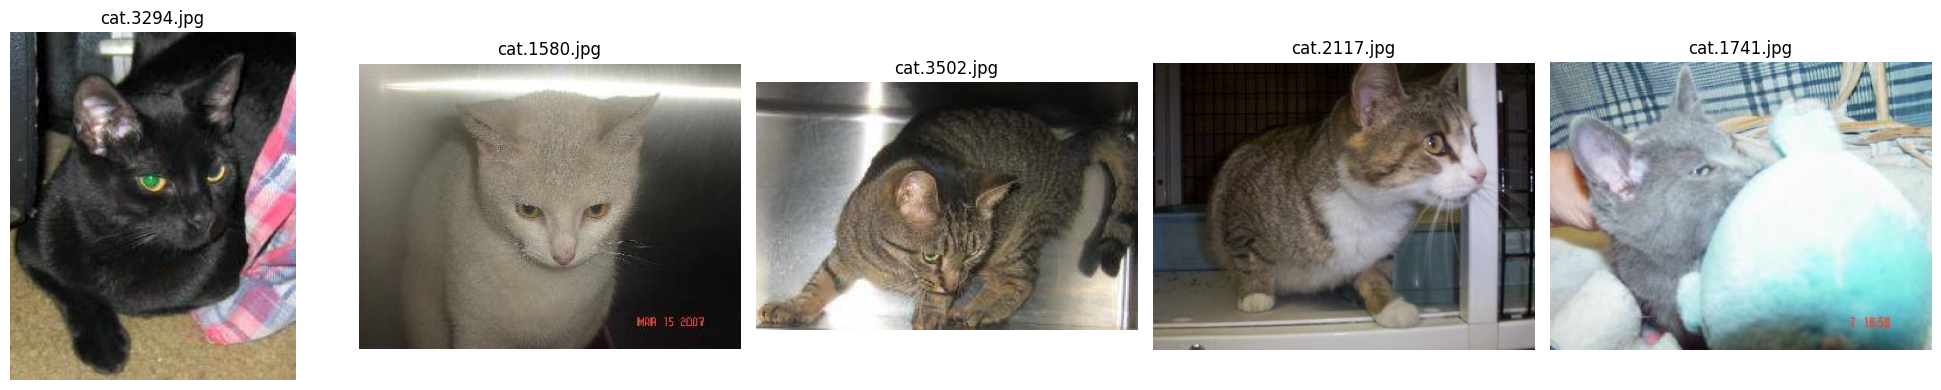

DOGS


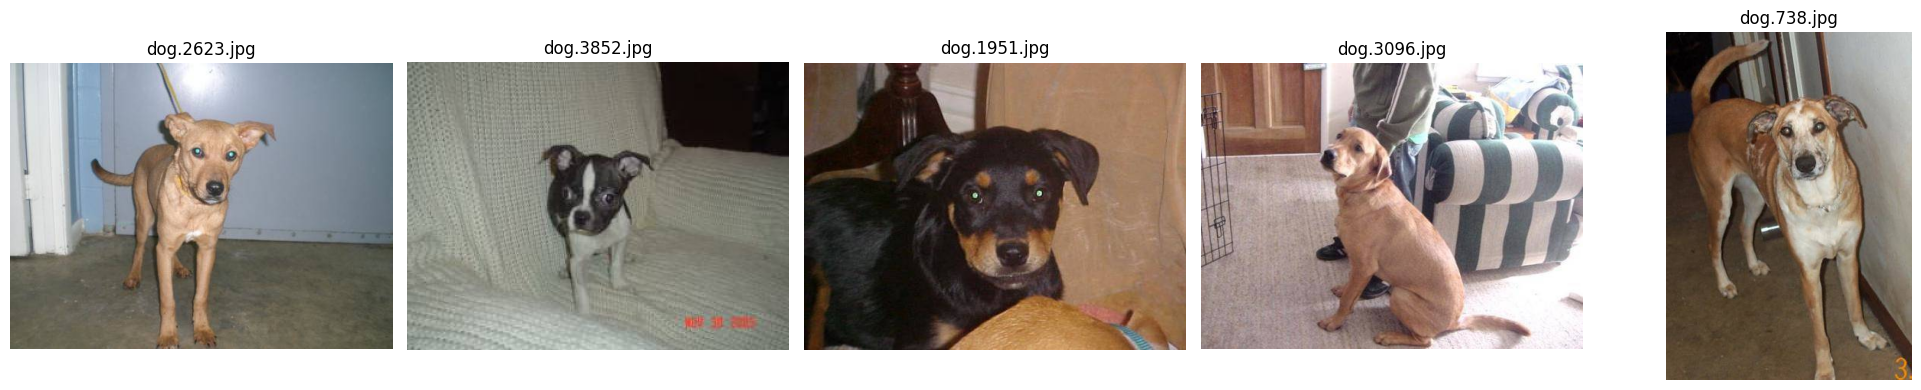

In [6]:
# Iterating through each class to plot its images
for label in classes:
    
    # Specify the path containing the images to visualize
    path_to_visualize = f"archive/training_set/training_set/{label}"

    # Visualize 5 random images
    print(label.upper())
    visualize_images(path_to_visualize, num_images=5)

In [7]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3),activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(128, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))


model.add(Dense(1, activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 128)       0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 492032)            0         
                                                                 
 dense (Dense)               (None, 128)               6

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# Train the model

history = model.fit(train_ds, batch_size=32, epochs=10, validation_data=val_ds, verbose=1)

Epoch 1/10
64/64 [==============================] - 453s 7s/step - loss: 48.9875 - accuracy: 0.4973 - val_loss: 0.6936 - val_accuracy: 0.4932
Epoch 2/10
64/64 [==============================] - 416s 7s/step - loss: 0.6607 - accuracy: 0.5744 - val_loss: 0.7048 - val_accuracy: 0.5056
Epoch 3/10
64/64 [==============================] - 488s 8s/step - loss: 0.6055 - accuracy: 0.6574 - val_loss: 1.0429 - val_accuracy: 0.5283
Epoch 4/10
64/64 [==============================] - 447s 7s/step - loss: 0.4834 - accuracy: 0.7370 - val_loss: 1.1426 - val_accuracy: 0.5307
Epoch 5/10
64/64 [==============================] - 422s 7s/step - loss: 0.3720 - accuracy: 0.8146 - val_loss: 1.3866 - val_accuracy: 0.5252
Epoch 6/10
64/64 [==============================] - 384s 6s/step - loss: 0.2844 - accuracy: 0.8705 - val_loss: 2.0828 - val_accuracy: 0.5468
Epoch 7/10
64/64 [==============================] - 400s 6s/step - loss: 0.1885 - accuracy: 0.9155 - val_loss: 2.1178 - val_accuracy: 0.5388
Epoch 8/10
6